In [4]:
import numpy as np
import pandas as pd

In [41]:
scl_data = pd.read_csv('scaler_clustering.csv')

In [3]:
scl_data.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [6]:
scl_data.drop(columns='Unnamed: 0',inplace=True)

In [5]:
scl_data.shape

(205843, 6)

- There are 205843 entries and 6 features

In [6]:
scl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [7]:
scl_data['email_hash'].value_counts()

bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66     8
                                                                    ..
bb2fe5e655ada7f7b7ac4a614db0b9c560e796bdfcaa4e5367e69eedfea93876     1
d6cdef97e759dbf1b7522babccbbbd5f164a75d1b4139e02c945958720f1ed79     1
700d1190c17aaa3f2dd9070e47a4c042ecd9205333545dbfaee0f85644d00306     1
c2a1c9e4b9f4e1ed7d889ee4560102c1e2235b2c1a0e59cea95a6fe55c658407     1
0bcfc1d05f2e8dc4147743a1313aa70a119b41b30d4a1f7e738a6a87d3712c31     1
Name: email_hash, Length: 153443, dtype: int64

In [7]:
#removing the null rows 
scl_data= scl_data[scl_data['company_hash'].notna()]
scl_data= scl_data[scl_data['orgyear'].notna()]

In [8]:
import regex

def resc(x):
    return regex.sub('[^A-Za-z0-9 ]+', '', x)

In [9]:
scl_data['company_hash']= scl_data['company_hash'].astype(str)


scl_data['company_hash'] = (scl_data['company_hash']).apply(lambda x: resc(x)).str.lower()


In [10]:
#Filling job_profile null values with the top 5 job profiles randomly without changing the ratio
def rand_prof(x):
    a=np.random.randint(0,9)
    l_cmpny = ['Backend Engineer','FullStack Engineer','Backend Engineer','Other','Other',
                'Backend Engineer','Frontend Engineer','Engineering Leadership','FullStack Engineer']
    return l_cmpny[a]

scl_data.loc[scl_data['job_position'].isnull(),'job_position'] = scl_data.loc[scl_data['job_position'].isnull(),'job_position'].apply(lambda x: rand_prof(x)) 

In [11]:
#Removing special characters using regex
scl_data['job_position']= scl_data['job_position'].astype(str)
scl_data['job_position'] = (scl_data['job_position']).apply(lambda x: resc(x)).str.lower()

In [12]:
#creating year of experience
scl_data['yoe']= scl_data['ctc_updated_year'] - scl_data['orgyear']

In [13]:
scl_data.loc[scl_data['yoe']<0,'yoe']=scl_data.loc[scl_data['yoe']<0,'yoe']*-1

In [14]:
scl_data.reset_index(drop=True,inplace=True)

In [15]:
scl_data[scl_data['yoe']>50]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe
3644,wgszxkvzn,2cc6bae4e52677d27ce3fca38d7a01ecbe537e1dc1c48d...,2106.0,600000,backend engineer,2021.0,85.0
13405,9xntwyzgrgsj,854ff163ded87211b944dfcaebdcf9e8efa45defc9582f...,0.0,700000,fullstack engineer,2021.0,2021.0
13679,oxtbtzo,4a64fdec422e657b175d5dd914b91e0df7c78ec7716bfe...,208.0,500000,fullstack engineer,2020.0,1812.0
15303,nvnv wgzohrnvzwj otqcxwto nwo,437fa88cd652351931ef679e6b074aa91acb384ef193dd...,209.0,300000,backend engineer,2021.0,1812.0
17119,sgxmxmg,6db474dae5093f975e43697cd77ac5a486248c26235778...,206.0,1500000,frontend engineer,2021.0,1815.0
30301,avqn xzzgcvnxgz,d767ad3012a86dab37a38a106f65d00b85189fe49a3f0f...,0.0,220000,backend engineer,2020.0,2020.0
31334,vbagwo,86dbdeada523d09881aec29ffa56ff63aca56f0278a97e...,1970.0,1800000,frontend engineer,2021.0,51.0
32051,lxg,ae1b500192dcd0b6c2d5c69b51f6caf19c630640c0aeb1...,0.0,600000,fullstack engineer,2021.0,2021.0
32205,mrvwpmhwp,f648fa217922f5a36b510df6346a2041a3483e21289069...,2101.0,1200000,other,2021.0,80.0
33080,mvzp ge vbtqxwv,8ef16126bd9a4691801d2830156dc5528142a45d314593...,0.0,1200000,fullstack engineer,2021.0,2021.0


- From above wrong input data of orgyear fixed the yoe

In [16]:
lst = [5,0,13,12,15,0,51,0,10,0,5,0,5,0,30,0,0,0,3,30,0,3,30,3,2,4,5,0,0,0,0,0,3,38,3,0,5,1.0,17.0,38.0,19.0,10.0,3.0,2.0,6.0,6.0,5.0,0.0,2.0,21.0,0.0,1.0,5.0]
k=0
for i in scl_data[scl_data['yoe']>50].index:
    scl_data.loc[i,'yoe']=lst[k]
    k=k+1

In [26]:
#removing outlier by range of ctc comparing to others
scl_data[scl_data['ctc']>1000000000]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe
72765,whmxw rgsxwo uqxcvnt rxbxnta,29a71dd13adf6d2d497571a565bb3096cf66cb46cd1ece...,2015.0,1000150000,other,2020.0,5.0


In [27]:
scl_data.drop(index=72765,inplace=True)

##### 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company

In [17]:

tier_cmpy = scl_data.groupby('company_hash')['ctc'].describe()

tier_cmpy.reset_index(inplace=True)

In [18]:
tier_cmpy.head()

,company_hash,count,mean,std,min,25%,50%,75%,max
0,0,2.0,100000.0,0.000000,100000.0,100000.0,100000.0,100000.0,100000.0
1,0000,1.0,300000.0,NaN,300000.0,300000.0,300000.0,300000.0,300000.0
2,01 ojztqsj,2.0,550000.0,395979.797464,270000.0,410000.0,550000.0,690000.0,830000.0
3,05mz exzytvrny uqxcvnt rxbxnta,2.0,1100000.0,0.000000,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
4,1,2.0,175000.0,106066.017178,100000.0,137500.0,175000.0,212500.0,250000.0


In [19]:
#creating tier_company column and storing the each job_company summary of ctc
scl_data['tier_company'] = scl_data['ctc']

dic={}
for i in range(len(tier_cmpy)):
    dic[tier_cmpy.iloc[i]['company_hash']]=[tier_cmpy.iloc[i]['50%'],tier_cmpy.iloc[i]['75%']]

In [20]:
#flag designation 
def flag(x,y):
    if y<=dic[x][0]:
        return 3
    elif y<=dic[x][1]:
        return 2
    else:
        return 1
    

for i in range(len(scl_data)):
    scl_data['tier_company'][i] = flag(scl_data['company_hash'][i],scl_data['ctc'][i])

C:\Users\vemul\AppData\Local\Temp\ipykernel_14704\2374546690.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scl_data['tier_company'][i] = flag(scl_data['company_hash'][i],scl_data['ctc'][i])


#### 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company, Job Position

In [21]:
tier_prof = scl_data.groupby(['company_hash','job_position'])['ctc'].describe()


In [22]:
tier_prof.head()

count       mean  std  \
company_hash                   job_position                               
0                              other                2.0   100000.0  0.0   
0000                           other                1.0   300000.0  NaN   
01 ojztqsj                     android engineer     1.0   270000.0  NaN   
                               frontend engineer    1.0   830000.0  NaN   
05mz exzytvrny uqxcvnt rxbxnta backend engineer     1.0  1100000.0  NaN   

                                                        min        25%  \
company_hash                   job_position                              
0                              other               100000.0   100000.0   
0000                           other               300000.0   300000.0   
01 ojztqsj                     android engineer    270000.0   270000.0   
                               frontend engineer   830000.0   830000.0   
05mz exzytvrny uqxcvnt rxbxnta backend engineer   1100000.0  1100000.0   

                                                        50%        75%  \
company_hash                   job_position                              
0                              other               100000.0   100000.0   
0000                           other               300000.0   300000.0   
01 ojztqsj                     android engineer    270000.0   270000.0   
                               frontend engineer   830000.0   830000.0   
05mz exzytvrny uqxcvnt rxbxnta backend engineer   1100000.0  1100000.0   

                                                        max  
company_hash                   job_position                  
0                              other               100000.0  
0000                           other               300000.0  
01 ojztqsj                     android engineer    270000.0  
                               frontend engineer   830000.0  
05mz exzytvrny uqxcvnt rxbxnta backend engineer   1100000.0

In [23]:
#creating tier_prof column and storing the each job_profile summary of ctc
scl_data['tier_proff'] = scl_data['ctc']

dic={}
for i in tier_prof.index:
    dic[i]=[tier_prof.loc[i]['50%'],tier_prof.loc[i]['75%']]

In [24]:
#flag designation
def flag(x,y):
    if y<=dic[x][0]:
        return 3
    elif y<=dic[x][1]:
        return 2
    else:
        return 1
    

for i in range(len(scl_data)):
    scl_data['tier_proff'][i] = flag((scl_data['company_hash'][i],scl_data['job_position'][i]),scl_data['ctc'][i])

C:\Users\vemul\AppData\Local\Temp\ipykernel_14704\2002971506.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scl_data['tier_proff'][i] = flag((scl_data['company_hash'][i],scl_data['job_position'][i]),scl_data['ctc'][i])


#### 5 point summary of CTC (mean, median, max, min, count etc) on the basis of Company, Job Position, Years of Experience

In [25]:
tier_yoe = scl_data.groupby(['company_hash','job_position','yoe'])['ctc'].describe()


In [26]:
tier_yoe.head()

count       mean  std  \
company_hash                   job_position      yoe                          
0                              other             0.0    2.0   100000.0  0.0   
0000                           other             3.0    1.0   300000.0  NaN   
01 ojztqsj                     android engineer  3.0    1.0   270000.0  NaN   
                               frontend engineer 8.0    1.0   830000.0  NaN   
05mz exzytvrny uqxcvnt rxbxnta backend engineer  2.0    1.0  1100000.0  NaN   

                                                            min        25%  \
company_hash                   job_position      yoe                         
0                              other             0.0   100000.0   100000.0   
0000                           other             3.0   300000.0   300000.0   
01 ojztqsj                     android engineer  3.0   270000.0   270000.0   
                               frontend engineer 8.0   830000.0   830000.0   
05mz exzytvrny uqxcvnt rxbxnta backend engineer  2.0  1100000.0  1100000.0   

                                                            50%        75%  \
company_hash                   job_position      yoe                         
0                              other             0.0   100000.0   100000.0   
0000                           other             3.0   300000.0   300000.0   
01 ojztqsj                     android engineer  3.0   270000.0   270000.0   
                               frontend engineer 8.0   830000.0   830000.0   
05mz exzytvrny uqxcvnt rxbxnta backend engineer  2.0  1100000.0  1100000.0   

                                                            max  
company_hash                   job_position      yoe             
0                              other             0.0   100000.0  
0000                           other             3.0   300000.0  
01 ojztqsj                     android engineer  3.0   270000.0  
                               frontend engineer 8.0   830000.0  
05mz exzytvrny uqxcvnt rxbxnta backend engineer  2.0  1100000.0

In [27]:
#creating tier_yoe column and storing the each job_yoe summary of ctc
scl_data['tier_yoe'] = scl_data['ctc']

dic={}
for i in tier_yoe.index:
    dic[i]=[tier_yoe.loc[i]['50%'],tier_yoe.loc[i]['75%']]

In [28]:

def flag(x,y):
    if y<=dic[x][0]:
        return 3
    elif y<=dic[x][1]:
        return 2
    else:
        return 1
    

for i in range(len(scl_data)):
    scl_data['tier_yoe'][i] = flag((scl_data['company_hash'][i],scl_data['job_position'][i],scl_data['yoe'][i]),scl_data['ctc'][i])

C:\Users\vemul\AppData\Local\Temp\ipykernel_14704\3131262683.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scl_data['tier_yoe'][i] = flag((scl_data['company_hash'][i],scl_data['job_position'][i],scl_data['yoe'][i]),scl_data['ctc'][i])


In [29]:
scl_data

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year,yoe,tier_company,tier_proff,tier_yoe
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,other,2020.0,4.0,2,1,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,fullstack engineer,2019.0,1.0,3,3,3
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,backend engineer,2020.0,5.0,3,3,3
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,backend engineer,2019.0,2.0,3,3,3
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,fullstack engineer,2019.0,2.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
205708,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,2008.0,220000,engineering leadership,2019.0,11.0,3,3,3
205709,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,2017.0,500000,fullstack engineer,2020.0,3.0,3,3,3
205710,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,2021.0,700000,other,2021.0,0.0,3,3,1
205711,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,2019.0,5100000,backend engineer,2019.0,0.0,1,1,1


- Top 10 employees (earning more than most of the employees in the company)

In [30]:
scl_data.groupby(['company_hash']).apply(lambda x : x.sort_values(by = 'ctc', ascending = False).head(10))

company_hash  \
company_hash                                                        
0                            2936                               0   
                             16804                              0   
0000                         197412                          0000   
01 ojztqsj                   55189                     01 ojztqsj   
                             74370                     01 ojztqsj   
...                                                           ...   
zz                           14651                             zz   
zzb ztdnstz vacxogqj ucn rna 72924   zzb ztdnstz vacxogqj ucn rna   
                             146531  zzb ztdnstz vacxogqj ucn rna   
zzgato                       116938                        zzgato   
zzzbzb                       15818                         zzzbzb   

                                                                            email_hash  \
company_hash                                                                             
0                            2936    e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...   
                             16804   e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...   
0000                         197412  b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...   
01 ojztqsj                   55189   e1e15fada844f35fcc33927343d0c80f55526b87c40eee...   
                             74370   819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...   
...                                                                                ...   
zz                           14651   d6923a6f81c7b36615d9f14349fe01aec442029b2c502f...   
zzb ztdnstz vacxogqj ucn rna 72924   ca8935e2314a1bac3947e60bbd2ee10524112898da29eb...   
                             146531  ca8935e2314a1bac3947e60bbd2ee10524112898da29eb...   
zzgato                       116938  d421e52125f8057c65fa554752be03b056221c8590ff26...   
zzzbzb                       15818   3d4fedde22283c75bb84220e962360c352991c3054839c...   

                                     orgyear     ctc            job_position  \
company_hash                                                                   
0                            2936     2020.0  100000                   other   
                             16804    2020.0  100000                   other   
0000                         197412   2017.0  300000                   other   
01 ojztqsj                   55189    2011.0  830000       frontend engineer   
                             74370    2016.0  270000        android engineer   
...                                      ...     ...                     ...   
zz                           14651    2009.0  500000  engineering leadership   
zzb ztdnstz vacxogqj ucn rna 72924    2017.0  600000      fullstack engineer   
                             146531   2017.0  600000        backend engineer   
zzgato                       116938   2014.0  130000        backend engineer   
zzzbzb                       15818    1990.0  720000                   other   

                                     ctc_updated_year   yoe  tier_company  \
company_hash                                                                
0                            2936              2020.0   0.0             3   
                             16804             2020.0   0.0             3   
0000                         197412            2020.0   3.0             3   
01 ojztqsj                   55189             2019.0   8.0             1   
                             74370             2019.0   3.0             3   
...                                               ...   ...           ...   
zz                           14651             2021.0  12.0             3   
zzb ztdnstz vacxogqj ucn rna 72924             2021.0   4.0             3   
                             146531            2021.0   4.0             3   
zzgato                       116938            2017.0   3.0             3   
zzzbzb             

- Top 10 employees of data science in Amazon / TCS etc earning more than their peers

In [31]:
scl_data[scl_data['job_position'].str.contains('data scien')].groupby(['company_hash']) \
    .apply(lambda x : x.sort_values(by = 'ctc', ascending = False).head(10))

company_hash  \
company_hash                                                              
10dvx rtvqzxzs                  116688                   10dvx rtvqzxzs   
1bs                             139587                              1bs   
                                177842                              1bs   
1stz                            188729                             1stz   
1stz urvnegqb ogrhnxgzo ucn rna 202899  1stz urvnegqb ogrhnxgzo ucn rna   
...                                                                 ...   
zxzlvwvqn                       39138                         zxzlvwvqn   
zxztrtvuo                       158893                        zxztrtvuo   
                                192734                        zxztrtvuo   
                                130833                        zxztrtvuo   
                                51628                         zxztrtvuo   

                                                                               email_hash  \
company_hash                                                                                
10dvx rtvqzxzs                  116688  48be30753b1dbf2c2fccf43b7f45c51d68bb5725f4ae76...   
1bs                             139587  6b01808bba4c2d50258b068274232251620630cb252a9c...   
                                177842  eb213c0552effd7fb139395c7838edb8d59773a1cb57a0...   
1stz                            188729  3dddd88f7d7ac6ace0dfd4927d881a9d452a3666c692bf...   
1stz urvnegqb ogrhnxgzo ucn rna 202899  4f4d3137aebfdc15fc4626314308ef082fd2dde54ef9f1...   
...                                                                                   ...   
zxzlvwvqn                       39138   2937acfa6802f83ff11ddbd3de1997b686107dad0c2b5d...   
zxztrtvuo                       158893  1cd0a52ed52dae24d605d9cdc8536499c10ce62bfb070f...   
                                192734  10d566c5fca40ffe1d133b79594d071880711ef480da9f...   
                                130833  3027ca561b65f99da2f65bf3d85c6bb5d5687c67e69e89...   
                                51628   f678c67bee8cad9370f6aaf4f4cc22ffd417fd753663c6...   

                                        orgyear      ctc    job_position  \
company_hash                                                               
10dvx rtvqzxzs                  116688   2020.0   400000  data scientist   
1bs                             139587   2018.0  1100000  data scientist   
                                177842   1994.0   800000  data scientist   
1stz                            188729   2017.0   400000  data scientist   
1stz urvnegqb ogrhnxgzo ucn rna 202899   2017.0   500000  data scientist   
...                                         ...      ...             ...   
zxzlvwvqn                       39138    2019.0  1900000  data scientist   
zxztrtvuo                       158893   2014.0  2250000  data scientist   
                                192734   2017.0  1400000  data scientist   
                                130833   2018.0  1370000  data scientist   
                                51628    2019.0  1250000  data scientist   

                                        ctc_updated_year   yoe  tier_company  \
company_hash                                                                   
10dvx rtvqzxzs                  116688            2020.0   0.0             3   
1bs                             139587            2021.0   3.0             3   
                                177842            2019.0  25.0             3   
1stz                            188729            2019.0   2.0             3   
1stz urvnegqb ogrhnxgzo ucn rna 202899            2019.0   2.0             3   
...                                                  ...   ...           ...   
zxzlvwvqn                       39138             2020.0   1.0             2   
zxztrtvuo                       158893            2021.0   7.0             1   
                                192734            2019.0   2.0             1   
    

- Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers 

In [32]:
scl_data[scl_data['job_position'].str.contains('data scien')].groupby(['company_hash']) \
    .apply(lambda x : x.sort_values(by = 'ctc', ascending = True).head(10))

company_hash  \
company_hash                                                              
10dvx rtvqzxzs                  116688                   10dvx rtvqzxzs   
1bs                             177842                              1bs   
                                139587                              1bs   
1stz                            188729                             1stz   
1stz urvnegqb ogrhnxgzo ucn rna 202899  1stz urvnegqb ogrhnxgzo ucn rna   
...                                                                 ...   
zxzlvwvqn                       39138                         zxzlvwvqn   
zxztrtvuo                       51628                         zxztrtvuo   
                                130833                        zxztrtvuo   
                                192734                        zxztrtvuo   
                                158893                        zxztrtvuo   

                                                                               email_hash  \
company_hash                                                                                
10dvx rtvqzxzs                  116688  48be30753b1dbf2c2fccf43b7f45c51d68bb5725f4ae76...   
1bs                             177842  eb213c0552effd7fb139395c7838edb8d59773a1cb57a0...   
                                139587  6b01808bba4c2d50258b068274232251620630cb252a9c...   
1stz                            188729  3dddd88f7d7ac6ace0dfd4927d881a9d452a3666c692bf...   
1stz urvnegqb ogrhnxgzo ucn rna 202899  4f4d3137aebfdc15fc4626314308ef082fd2dde54ef9f1...   
...                                                                                   ...   
zxzlvwvqn                       39138   2937acfa6802f83ff11ddbd3de1997b686107dad0c2b5d...   
zxztrtvuo                       51628   f678c67bee8cad9370f6aaf4f4cc22ffd417fd753663c6...   
                                130833  3027ca561b65f99da2f65bf3d85c6bb5d5687c67e69e89...   
                                192734  10d566c5fca40ffe1d133b79594d071880711ef480da9f...   
                                158893  1cd0a52ed52dae24d605d9cdc8536499c10ce62bfb070f...   

                                        orgyear      ctc    job_position  \
company_hash                                                               
10dvx rtvqzxzs                  116688   2020.0   400000  data scientist   
1bs                             177842   1994.0   800000  data scientist   
                                139587   2018.0  1100000  data scientist   
1stz                            188729   2017.0   400000  data scientist   
1stz urvnegqb ogrhnxgzo ucn rna 202899   2017.0   500000  data scientist   
...                                         ...      ...             ...   
zxzlvwvqn                       39138    2019.0  1900000  data scientist   
zxztrtvuo                       51628    2019.0  1250000  data scientist   
                                130833   2018.0  1370000  data scientist   
                                192734   2017.0  1400000  data scientist   
                                158893   2014.0  2250000  data scientist   

                                        ctc_updated_year   yoe  tier_company  \
company_hash                                                                   
10dvx rtvqzxzs                  116688            2020.0   0.0             3   
1bs                             177842            2019.0  25.0             3   
                                139587            2021.0   3.0             3   
1stz                            188729            2019.0   2.0             3   
1stz urvnegqb ogrhnxgzo ucn rna 202899            2019.0   2.0             3   
...                                                  ...   ...           ...   
zxzlvwvqn                       39138             2020.0   1.0             2   
zxztrtvuo                       51628             2021.0   2.0             2   
                                130833            2019.0   1.0             1   
    

- Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [33]:
scl_data.groupby(['company_hash']).apply(lambda x : x.sort_values(by = 'ctc', ascending = True).head(10))

company_hash  \
company_hash                                                        
0                            2936                               0   
                             16804                              0   
0000                         197412                          0000   
01 ojztqsj                   74370                     01 ojztqsj   
                             55189                     01 ojztqsj   
...                                                           ...   
zz                           4370                              zz   
zzb ztdnstz vacxogqj ucn rna 72924   zzb ztdnstz vacxogqj ucn rna   
                             146531  zzb ztdnstz vacxogqj ucn rna   
zzgato                       116938                        zzgato   
zzzbzb                       15818                         zzzbzb   

                                                                            email_hash  \
company_hash                                                                             
0                            2936    e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...   
                             16804   e80f7c9c26012bfdeca551e2b8642a93e45939d3d677c5...   
0000                         197412  b3f3bb98cbca4b1ce5dfd5abb4e500ce6f6b66288a5202...   
01 ojztqsj                   74370   819789ff4068fd5c8facf8a5074cdd2e1ff989c95ae02c...   
                             55189   e1e15fada844f35fcc33927343d0c80f55526b87c40eee...   
...                                                                                ...   
zz                           4370    7d4588453bc463b39db8c77ef0f856957fc42f5d54cae4...   
zzb ztdnstz vacxogqj ucn rna 72924   ca8935e2314a1bac3947e60bbd2ee10524112898da29eb...   
                             146531  ca8935e2314a1bac3947e60bbd2ee10524112898da29eb...   
zzgato                       116938  d421e52125f8057c65fa554752be03b056221c8590ff26...   
zzzbzb                       15818   3d4fedde22283c75bb84220e962360c352991c3054839c...   

                                     orgyear      ctc        job_position  \
company_hash                                                                
0                            2936     2020.0   100000               other   
                             16804    2020.0   100000               other   
0000                         197412   2017.0   300000               other   
01 ojztqsj                   74370    2016.0   270000    android engineer   
                             55189    2011.0   830000   frontend engineer   
...                                      ...      ...                 ...   
zz                           4370     2013.0  1370000               other   
zzb ztdnstz vacxogqj ucn rna 72924    2017.0   600000  fullstack engineer   
                             146531   2017.0   600000    backend engineer   
zzgato                       116938   2014.0   130000    backend engineer   
zzzbzb                       15818    1990.0   720000               other   

                                     ctc_updated_year   yoe  tier_company  \
company_hash                                                                
0                            2936              2020.0   0.0             3   
                             16804             2020.0   0.0             3   
0000                         197412            2020.0   3.0             3   
01 ojztqsj                   74370             2019.0   3.0             3   
                             55189             2019.0   8.0             1   
...                                               ...   ...           ...   
zz                           4370              2020.0   7.0             1   
zzb ztdnstz vacxogqj ucn rna 72924             2021.0   4.0             3   
                             146531            2021.0   4.0             3   
zzgato                       116938            2017.0   3.0             3   
zzzbzb                       15818             2020.0  30.

- Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X


In [34]:
scl_data[scl_data['yoe']>4].groupby(['company_hash']).apply(lambda x : x.sort_values(by = 'ctc', ascending = False).head(10))[['company_hash','job_position','ctc']]

company_hash  \
company_hash                                                              
01 ojztqsj                      55189                        01 ojztqsj   
10                              83358                                10   
                                86236                                10   
10 axsxnvr  ahmvx  rgzagz       121676        10 axsxnvr  ahmvx  rgzagz   
10p xzeg avnv ogrhnxgzo ucn rna 113014  10p xzeg avnv ogrhnxgzo ucn rna   
...                                                                 ...   
zyuw rxbxnta                    95634                      zyuw rxbxnta   
zyvzwt wgzohrnxzs tzsxzttqo     55202       zyvzwt wgzohrnxzs tzsxzttqo   
zz                              4370                                 zz   
                                14651                                zz   
zzzbzb                          15818                            zzzbzb   

                                                  job_position      ctc  
company_hash                                                             
01 ojztqsj                      55189        frontend engineer   830000  
10                              83358         backend engineer   450000  
                                86236        frontend engineer   450000  
10 axsxnvr  ahmvx  rgzagz       121676        android engineer  1300000  
10p xzeg avnv ogrhnxgzo ucn rna 113014                   other  1100000  
...                                                        ...      ...  
zyuw rxbxnta                    95634        frontend engineer  2400000  
zyvzwt wgzohrnxzs tzsxzttqo     55202        frontend engineer   940000  
zz                              4370                     other  1370000  
                                14651   engineering leadership   500000  
zzzbzb                          15818                    other   720000  

[41556 rows x 3 columns]

- Top 10 companies (based on their CTC)

In [35]:
grp_cmpny = scl_data.groupby(['company_hash'])['company_hash','ctc'].agg({'ctc':max}).reset_index()
grp_cmpny.sort_values('ctc',ascending=False)[:10]

C:\Users\vemul\AppData\Local\Temp\ipykernel_14704\2278226335.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grp_cmpny = scl_data.groupby(['company_hash'])['company_hash','ctc'].agg({'ctc':max}).reset_index()


,company_hash,ctc
30473,whmxw rgsxwo uqxcvnt rxbxnta,1000150000
14517,obvqnuqxdwgb,255555555
1217,aveegaxr xzntqzvnxgzvr hzxctqoxnj,250000000
11425,mvlvl vhng rna,200000000
21511,sgraygbk wgzohrnxzs,200000000
15863,onvqnhu,200000000
6868,ftrro evqsg,200000000
35996,zgn jtn fgqpxzsx vb onxrr onhajxzs,200000000
16645,outwnqt vzvrjnxwv,200000000
28482,vtsxo,200000000


- Top 2 positions in every company (based on their CTC)

In [36]:
scl_data.groupby(['company_hash']).apply(lambda x : x.sort_values(by = 'ctc', ascending = False).head(2))[['job_position','ctc']]

job_position     ctc
company_hash                                                       
0                            2936                     other  100000
                             16804                    other  100000
0000                         197412                   other  300000
01 ojztqsj                   55189        frontend engineer  830000
                             74370         android engineer  270000
...                                                     ...     ...
zz                           14651   engineering leadership  500000
zzb ztdnstz vacxogqj ucn rna 72924       fullstack engineer  600000
                             146531        backend engineer  600000
zzgato                       116938        backend engineer  130000
zzzbzb                       15818                    other  720000

[51074 rows x 2 columns]

<AxesSubplot:xlabel='ctc', ylabel='Count'>

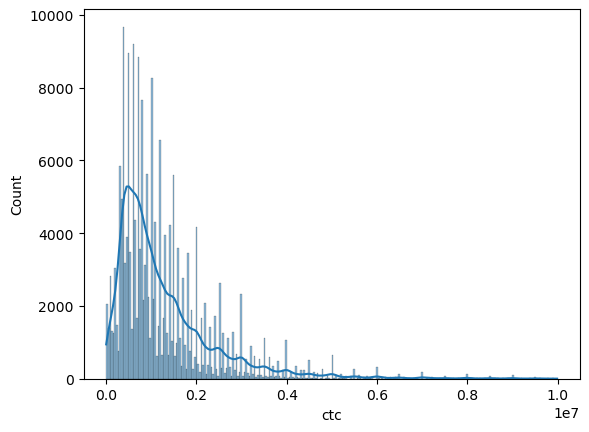

In [ ]:
import seaborn as sns

sns.histplot(data=scl_data[scl_data['ctc']<10000000],x='ctc',kde=True)

In [ ]:
scl_data['ctc']=np.log(scl_data['ctc'])

<AxesSubplot:xlabel='ctc', ylabel='Count'>

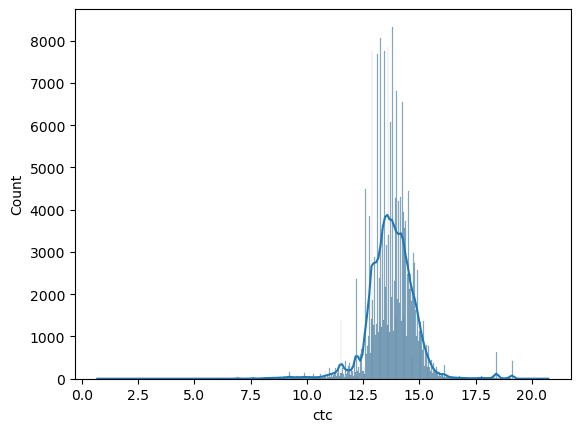

In [ ]:
import seaborn as sns

sns.histplot(data=scl_data,x='ctc',kde=True)

- preprocessing data for clustering

In [ ]:
scl_data

In [37]:
X = scl_data[['ctc','yoe', 'tier_company', 'tier_proff', 'tier_yoe']]

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#### Checking clustering tendency

In [39]:
from pyclustertend import hopkins

In [40]:
hopkins(X, X.shape[0])

0.00014098543932766097

- The null hypothesis (no meaningfull cluster) happens when the hopkins test is around 0.5 and the hopkins test tends to 0 when meaningful cluster exists in the space. Usually, we can believe in the existence of clusters when the hopkins score is bellow 0.25.

In [41]:
scl_data.columns

Index(['company_hash', 'email_hash', 'orgyear', 'ctc', 'job_position',
       'ctc_updated_year', 'yoe', 'tier_company', 'tier_proff', 'tier_yoe'],
      dtype='object')

#### Elbow method & K- means clustering

In [42]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

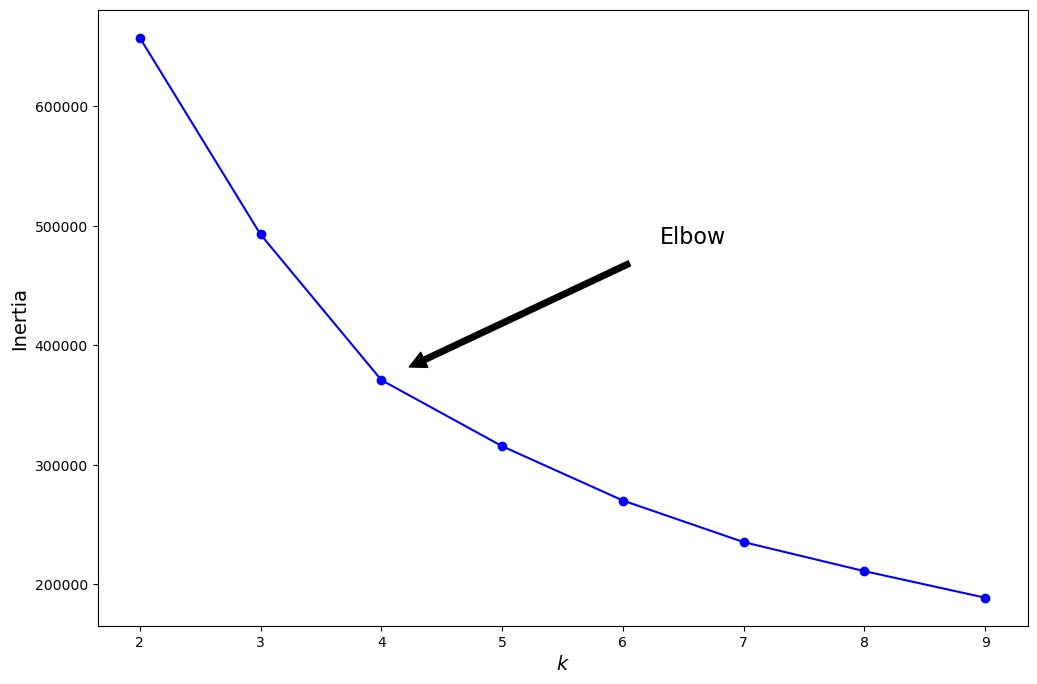

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(range(2, 10), inertias[1:], "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [63]:
k = 4## arbitrary value
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [64]:
pred_data = scl_data.copy()
pred_data['pred_cluster'] = y_pred

<AxesSubplot:xlabel='pred_cluster', ylabel='ctc'>

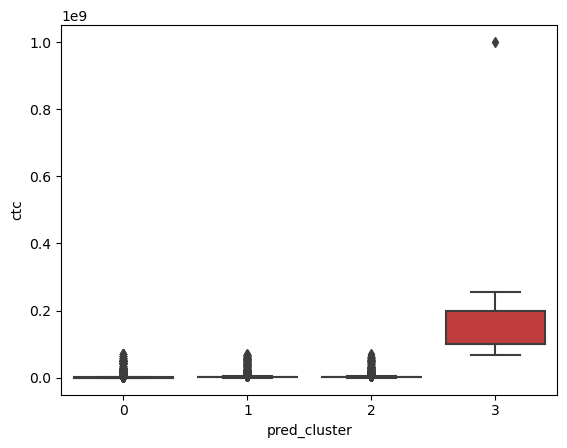

In [65]:
import seaborn as sns

sns.boxplot(data=pred_data,x='pred_cluster',y='ctc')

<AxesSubplot:xlabel='pred_cluster', ylabel='count'>

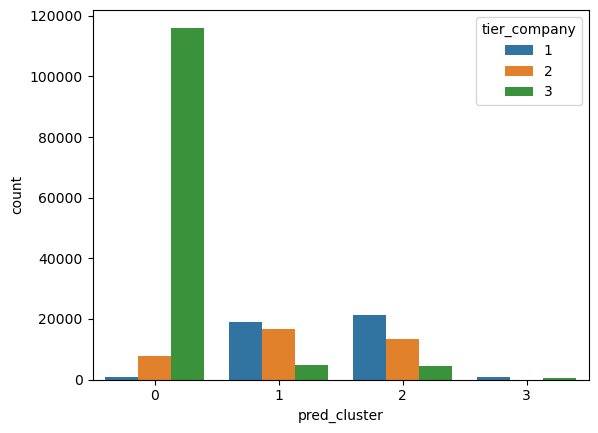

In [66]:
sns.countplot(data=pred_data,x='pred_cluster',hue='tier_company')

<AxesSubplot:xlabel='pred_cluster', ylabel='ctc'>

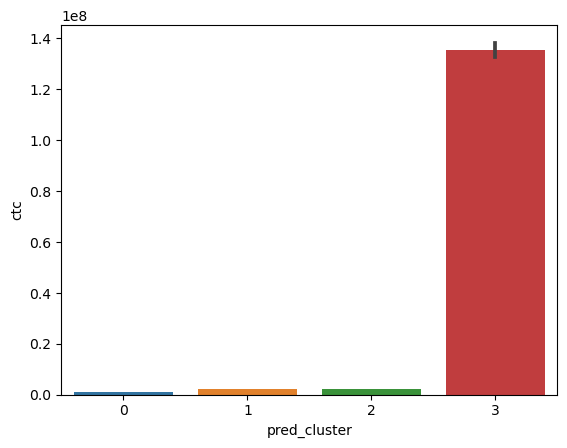

In [71]:
sns.barplot(data=pred_data,x='pred_cluster',y='ctc')

<AxesSubplot:xlabel='pred_cluster', ylabel='ctc'>

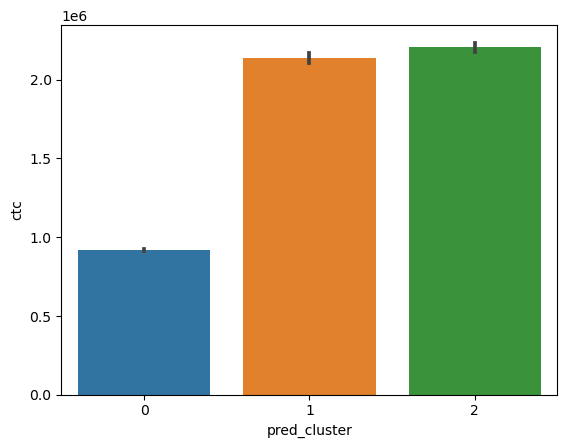

In [72]:
sns.barplot(data=pred_data[pred_data['pred_cluster']!=3],x='pred_cluster',y='ctc')

<AxesSubplot:xlabel='pred_cluster', ylabel='count'>

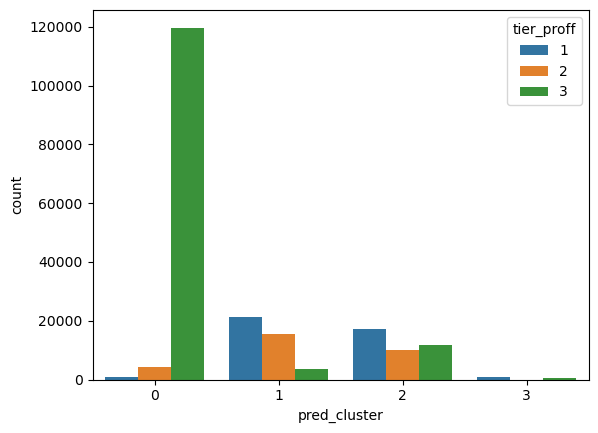

In [68]:
sns.countplot(data=pred_data,x='pred_cluster',hue='tier_proff')

<AxesSubplot:xlabel='pred_cluster', ylabel='yoe'>

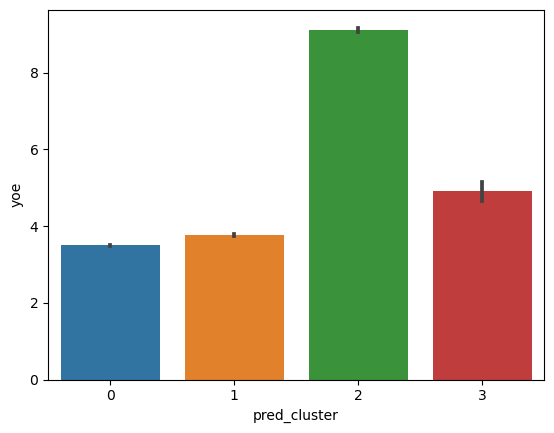

In [69]:
sns.barplot(data=pred_data,x='pred_cluster',y='yoe')

<AxesSubplot:xlabel='pred_cluster', ylabel='yoe'>

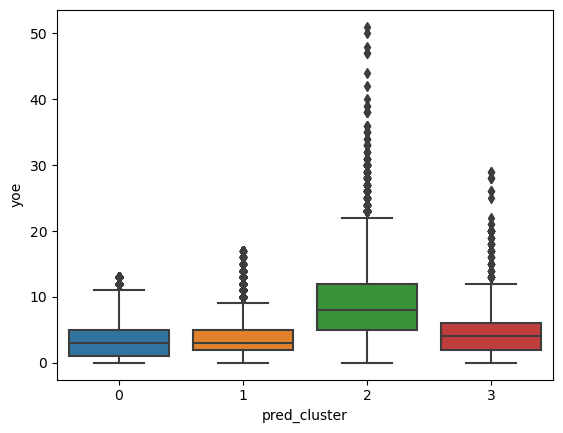

In [70]:
sns.boxplot(data=pred_data,x='pred_cluster',y='yoe')

In [73]:
pred_data['pred_cluster'].value_counts()

0    124776
1     40575
2     39033
3      1329
Name: pred_cluster, dtype: int64

### Actionable Insights & Recommendations for the Business.
- 3rd cluster has characteristics of highly paid employees and also there are some tier 3 as we are having only one employee from that company we assigned to tier 3. If there are companies that are high CTC we can recommend them as many of them are tier 1 and highly CTC.
- 2nd cluster has characteristics of highly experienced employees in different company tiers. So we can recommend changing their job profile to improve their tier by learning new skills.
- 0th cluster has more tier 3, low CTC, and less experienced we can recommend learning skills that improve growth to the high tier.
- 1st cluster are having tier 1 and 2 with low CTC, and less experience we can recommend switching companies as they are getting low CTC in tier 1 and 2.

### Hierarchical clustering 

In [51]:
sam_data = scl_data.sample(10000)

In [52]:
df = sam_data[['ctc','yoe', 'tier_company', 'tier_proff', 'tier_yoe']]

In [53]:
std_scaler = StandardScaler()
std_scaler.fit(df)
x= std_scaler.transform(df)

In [54]:
scaled_df = pd.DataFrame(x, columns=df.columns, index=df.index)

In [55]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch

Z = sch.linkage(scaled_df, method='ward')

Text(0, 0.5, 'distance')

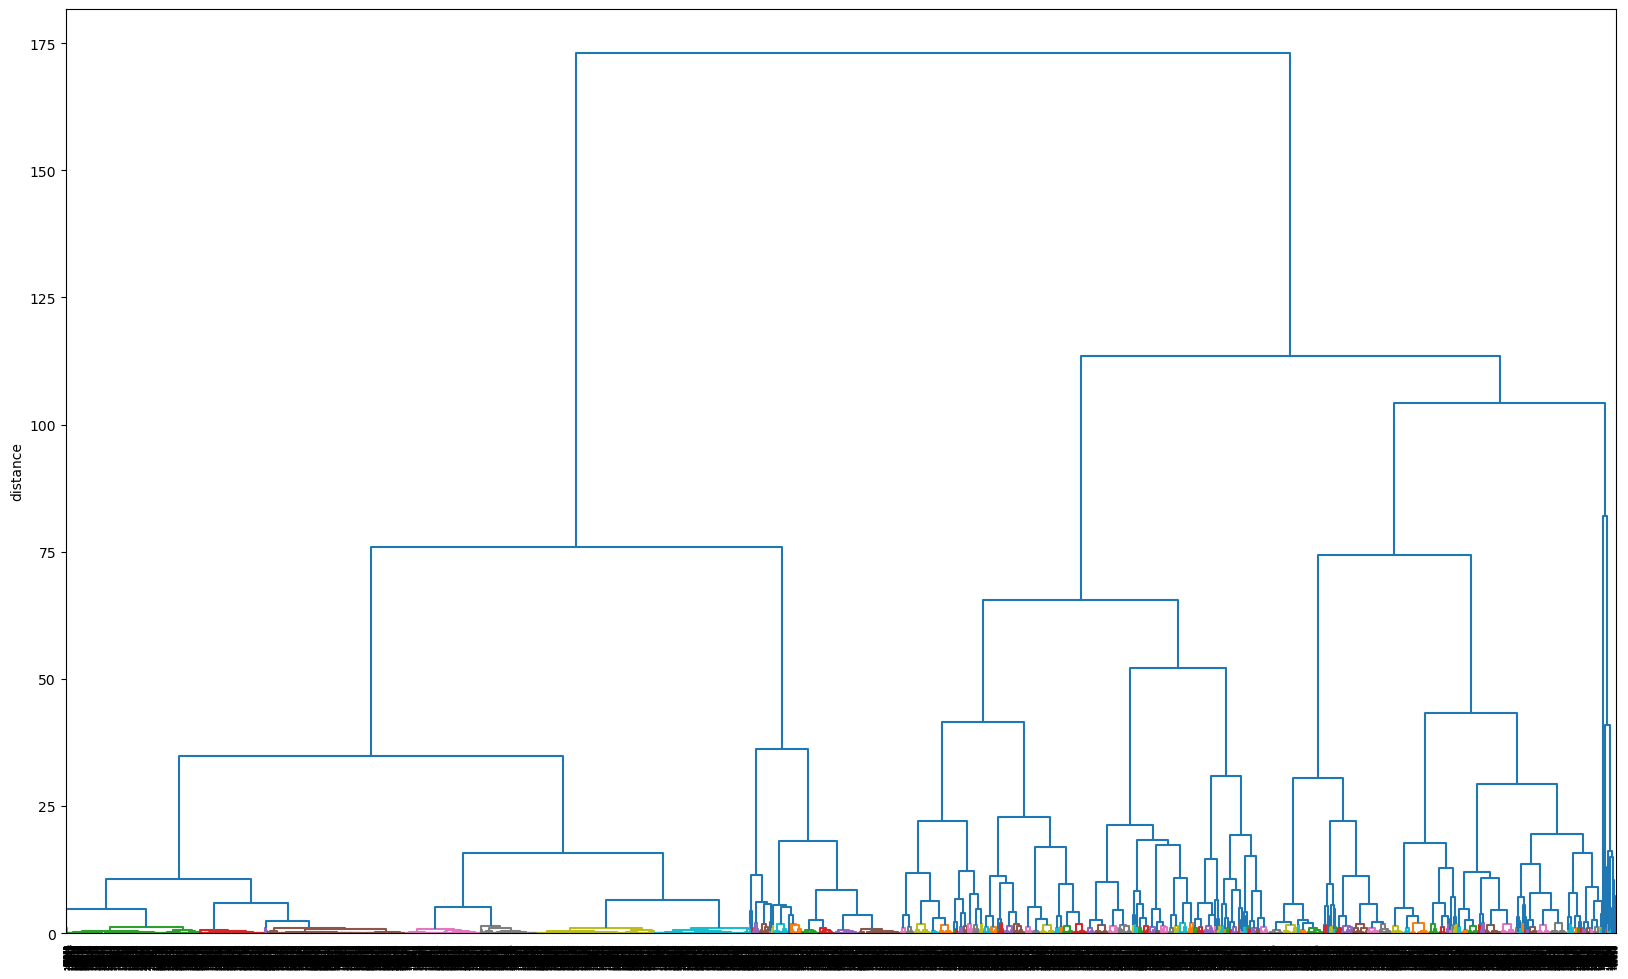

In [56]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')